In [1]:
import pandas as pd
import os

In [71]:
results = []
for r_dir in ["AllExperiments_Size", "AllExperiments_Time"]:
    metric = r_dir.split("_")[1]
    list_video_dir = [i for i in os.listdir(r_dir) if i.startswith("x264")]
    for v_d in list_video_dir:
        video = v_d.split("_")[1]
        list_run_dir = [i for i in os.listdir(r_dir+"/"+v_d) if i.startswith("x264")]
        for r_d in list_run_dir:
            run = r_d.split("_")[2]
            list_csv = [i for i in os.listdir(r_dir+"/"+v_d+"/"+r_d) if i.endswith(".csv")]
            for csv in list_csv:
                _, sampling, size = csv.split(".")[0].split("_")
                df = pd.read_csv(r_dir+"/"+v_d+"/"+r_d+"/"+csv, sep=";")
                result = df.sum().to_dict()
                result["n_rows"] = df.shape[0]
                result["video"] = video
                result["run"] = run
                result["sampling"] = sampling
                result["size"] = size
                result["metric"] = metric
                results.append(result)

In [72]:
df_results = pd.DataFrame(results)
df_results.groupby(["metric","sampling","size"]).sum()

root    no_asm  no_8x8dct  no_cabac  no_deblock  \
metric sampling     size                                                        
Size   distBased    t1     20400.0   20400.0    17238.0   15096.0     12529.0   
                    t2    110500.0  110500.0    87023.0   78829.0     66215.0   
                    t3    360400.0  360400.0   236045.0  231319.0    211531.0   
       divDistBased t1     20400.0   20400.0    12614.0   12699.0     12036.0   
                    t2    110500.0  110500.0    49453.0   52649.0     55879.0   
                    t3    360400.0  360400.0   187799.0  189686.0    173706.0   
       henard       t1     20400.0   20400.0     6579.0    6239.0      6205.0   
                    t2    110500.0  110500.0    51102.0   44761.0     44540.0   
                    t3    360400.0  360400.0   175423.0  132141.0    171020.0   
       random       t1     20400.0   20400.0    10336.0   10404.0     10064.0   
                    t2    110500.0  110500.0    55692.0   55658.0     55148.0   
                    t3    360400.0  360400.0   179163.0  181135.0    179894.0   
       solverBased  t1     20400.0   20400.0     9826.0    6426.0      8993.0   
                    t2    110500.0  110500.0    42806.0   55114.0     53907.0   
                    t3    360400.0  360400.0   163829.0  154105.0    162333.0   
       twise        t1     20400.0   20400.0     1700.0    1700.0      1700.0   
                    t2    110500.0  110500.0    18700.0   18700.0     18700.0   
                    t3    360400.0  360400.0    91800.0   91800.0     91800.0   
Time   distBased    t1     20400.0   20400.0    17238.0   15096.0     12529.0   
                    t2    110500.0  110500.0    87023.0   78829.0     66215.0   
                    t3    360400.0  360400.0   236045.0  231319.0    211531.0   
       divDistBased t1     20400.0   20400.0    12614.0   12699.0     12036.0   
                    t2    110500.0  110500.0    49453.0   52649.0     55879.0   
                    t3    360400.0  360400.0   187799.0  189686.0    173706.0   
       henard       t1     20400.0   20400.0     6579.0    6239.0      6205.0   
                    t2    110500.0  110500.0    51102.0   44761.0     44540.0   
                    t3    360400.0  360400.0   175423.0  132141.0    171020.0   
       random       t1     20400.0   20400.0    10336.0   10404.0     10064.0   
                    t2    110500.0  110500.0    55692.0   55658.0     55148.0   
                    t3    360400.0  360400.0   179163.0  181135.0    179894.0   
       solverBased  t1     20400.0   20400.0     9826.0    6426.0      8993.0   
                    t2    110500.0  110500.0    42806.0   55114.0     53907.0   
                    t3    360400.0  360400.0   163829.0  154105.0    162333.0   
       twise        t1     20400.0   20400.0     1700.0    1700.0      1700.0   
                    t2    110500.0  110500.0    18700.0   18700.0     18700.0   
                    t3    360400.0  360400.0    91800.0   91800.0     91800.0   

                          no_fast_pskip  no_mbtree  no_mixed_refs  no_weightb  \
metric sampling     size                                                        
Size   distBased    t1          10217.0     7786.0         5678.0      3128.0   
                    t2          55148.0    42568.0        30770.0     21284.0   
                    t3         181220.0   146795.0       105434.0    143276.0   
       divDistBased t1          10438.0     8075.0         5729.0     10081.0   
                    t2          55131.0    52819.0        43282.0     72624.0   
                    t3         165223.0   175933.0       177531.0    185742.0   
       henard       t1            935.0        0.0            0.0         0.0   
                    t2          48229.0    48348.0        43877.0       136.0   
                    t3         171258.0   164390.0       168776.0    164560.0   
       random       t1          10506.0    10098.0        10

Sample size T1

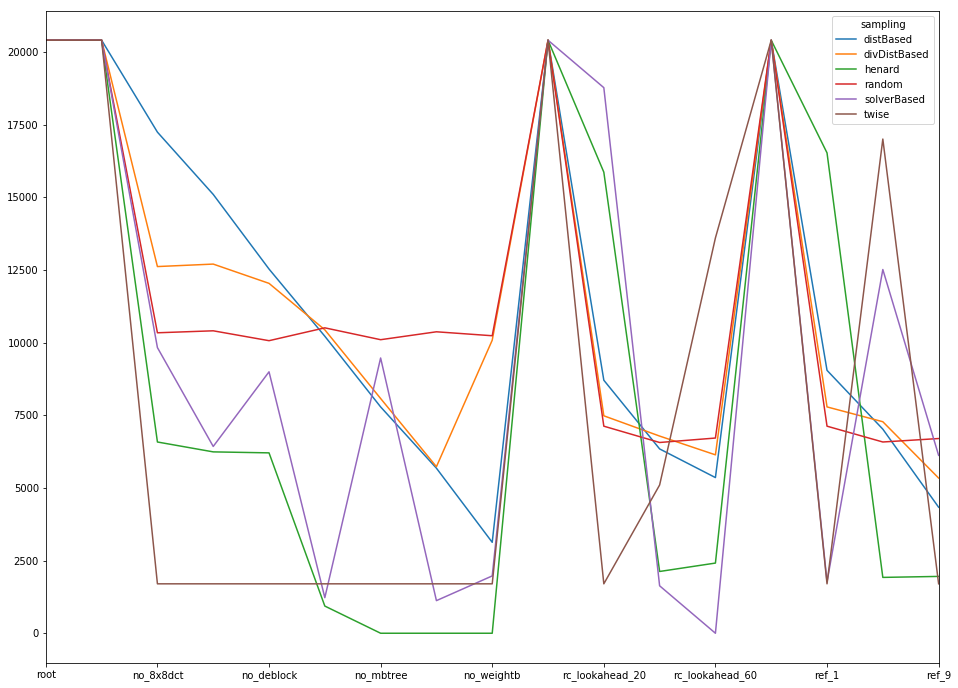

In [70]:
plt = df_results[((df_results["size"]=="t1") & (df_results["metric"]=="Size"))].groupby(["sampling"]).sum().drop(columns=["n_rows"]).T.plot(figsize=(16,12))

Sample size T2

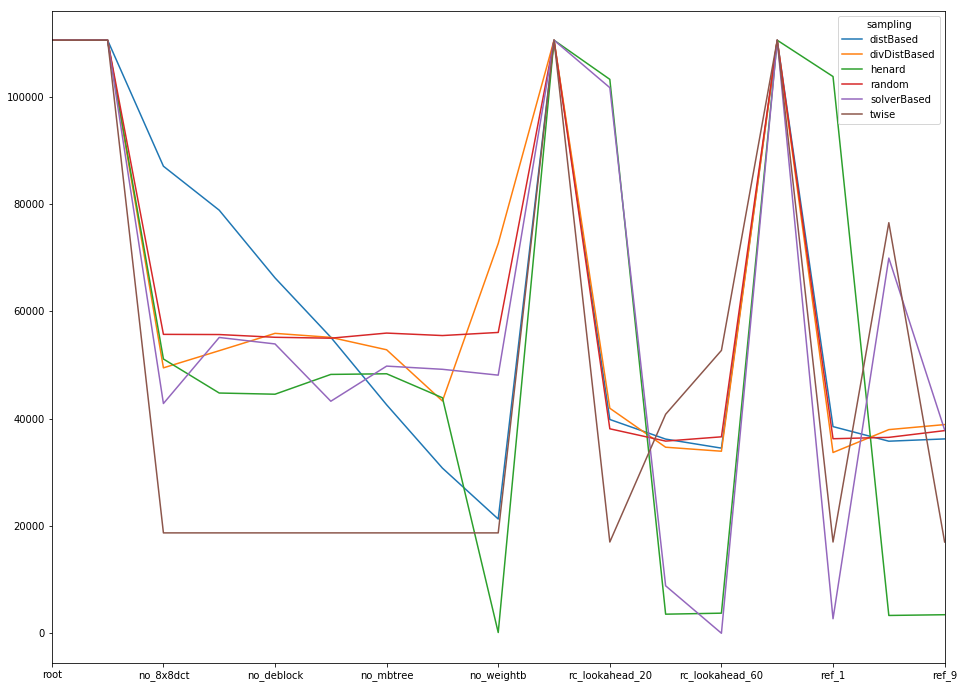

In [68]:
plt = df_results[((df_results["size"]=="t2") & (df_results["metric"]=="Size"))].groupby(["sampling"]).sum().drop(columns=["n_rows"]).T.plot(figsize=(16,12))

Sample size T3

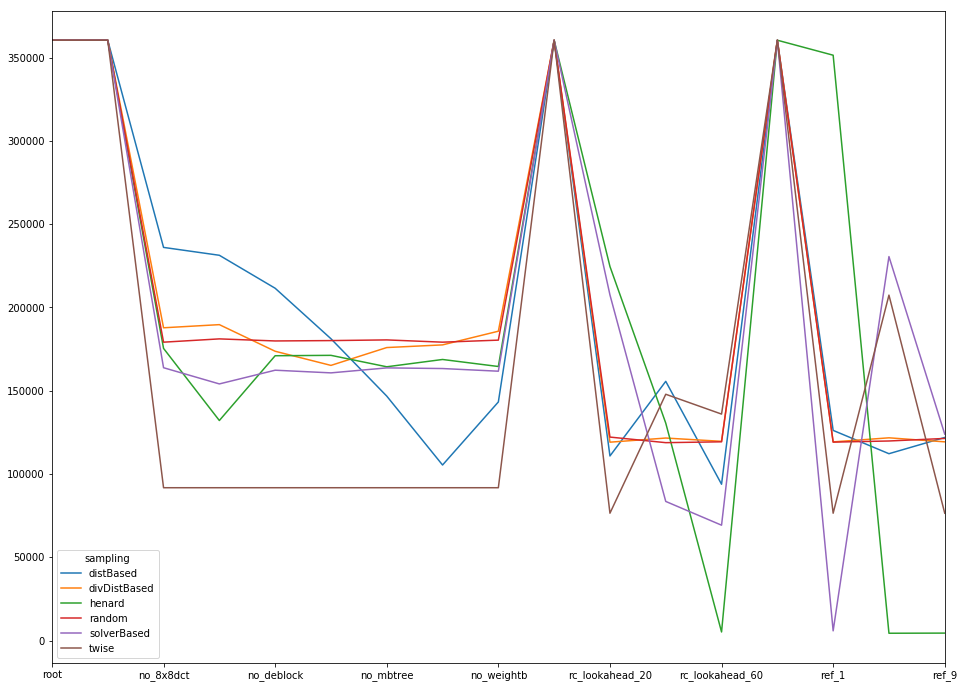

In [69]:
plt = df_results[((df_results["size"]=="t3") & (df_results["metric"]=="Size"))].groupby(["sampling"]).sum().drop(columns=["n_rows"]).T.plot(figsize=(16,12))

In [75]:
df_results_grouped = df_results.groupby(["metric","sampling","size"]).sum()
df_results_grouped["Performance"] = df_results_grouped["Performance"] / df_results_grouped["n_rows"]
df_results_grouped

root    no_asm  no_8x8dct  no_cabac  no_deblock  \
metric sampling     size                                                        
Size   distBased    t1     20400.0   20400.0    17238.0   15096.0     12529.0   
                    t2    110500.0  110500.0    87023.0   78829.0     66215.0   
                    t3    360400.0  360400.0   236045.0  231319.0    211531.0   
       divDistBased t1     20400.0   20400.0    12614.0   12699.0     12036.0   
                    t2    110500.0  110500.0    49453.0   52649.0     55879.0   
                    t3    360400.0  360400.0   187799.0  189686.0    173706.0   
       henard       t1     20400.0   20400.0     6579.0    6239.0      6205.0   
                    t2    110500.0  110500.0    51102.0   44761.0     44540.0   
                    t3    360400.0  360400.0   175423.0  132141.0    171020.0   
       random       t1     20400.0   20400.0    10336.0   10404.0     10064.0   
                    t2    110500.0  110500.0    55692.0   55658.0     55148.0   
                    t3    360400.0  360400.0   179163.0  181135.0    179894.0   
       solverBased  t1     20400.0   20400.0     9826.0    6426.0      8993.0   
                    t2    110500.0  110500.0    42806.0   55114.0     53907.0   
                    t3    360400.0  360400.0   163829.0  154105.0    162333.0   
       twise        t1     20400.0   20400.0     1700.0    1700.0      1700.0   
                    t2    110500.0  110500.0    18700.0   18700.0     18700.0   
                    t3    360400.0  360400.0    91800.0   91800.0     91800.0   
Time   distBased    t1     20400.0   20400.0    17238.0   15096.0     12529.0   
                    t2    110500.0  110500.0    87023.0   78829.0     66215.0   
                    t3    360400.0  360400.0   236045.0  231319.0    211531.0   
       divDistBased t1     20400.0   20400.0    12614.0   12699.0     12036.0   
                    t2    110500.0  110500.0    49453.0   52649.0     55879.0   
                    t3    360400.0  360400.0   187799.0  189686.0    173706.0   
       henard       t1     20400.0   20400.0     6579.0    6239.0      6205.0   
                    t2    110500.0  110500.0    51102.0   44761.0     44540.0   
                    t3    360400.0  360400.0   175423.0  132141.0    171020.0   
       random       t1     20400.0   20400.0    10336.0   10404.0     10064.0   
                    t2    110500.0  110500.0    55692.0   55658.0     55148.0   
                    t3    360400.0  360400.0   179163.0  181135.0    179894.0   
       solverBased  t1     20400.0   20400.0     9826.0    6426.0      8993.0   
                    t2    110500.0  110500.0    42806.0   55114.0     53907.0   
                    t3    360400.0  360400.0   163829.0  154105.0    162333.0   
       twise        t1     20400.0   20400.0     1700.0    1700.0      1700.0   
                    t2    110500.0  110500.0    18700.0   18700.0     18700.0   
                    t3    360400.0  360400.0    91800.0   91800.0     91800.0   

                          no_fast_pskip  no_mbtree  no_mixed_refs  no_weightb  \
metric sampling     size                                                        
Size   distBased    t1          10217.0     7786.0         5678.0      3128.0   
                    t2          55148.0    42568.0        30770.0     21284.0   
                    t3         181220.0   146795.0       105434.0    143276.0   
       divDistBased t1          10438.0     8075.0         5729.0     10081.0   
                    t2          55131.0    52819.0        43282.0     72624.0   
                    t3         165223.0   175933.0       177531.0    185742.0   
       henard       t1            935.0        0.0            0.0         0.0   
                    t2          48229.0    48348.0        43877.0       136.0   
                    t3         171258.0   164390.0       168776.0    164560.0   
       random       t1          10506.0    10098.0        10

In [77]:
df_results[((df_results["size"]=="t3") & (df_results["metric"]=="Size") & (df_results["sampling"]=="distBased"))]

,root,no_asm,no_8x8dct,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,...,ref_1,ref_5,ref_9,Performance,n_rows,video,run,sampling,size,metric
13,212.0,212.0,130.0,129.0,109.0,115.0,97.0,78.0,63.0,212.0,...,87.0,66.0,59.0,2.768271e+09,212,15,82,distBased,t3,Size
31,212.0,212.0,126.0,141.0,136.0,117.0,89.0,64.0,44.0,212.0,...,70.0,59.0,83.0,2.809455e+09,212,15,48,distBased,t3,Size
49,212.0,212.0,146.0,138.0,120.0,96.0,65.0,46.0,131.0,212.0,...,80.0,62.0,70.0,2.974870e+09,212,15,39,distBased,t3,Size
67,212.0,212.0,136.0,135.0,115.0,87.0,128.0,58.0,45.0,212.0,...,73.0,65.0,74.0,2.526264e+09,212,15,54,distBased,t3,Size
85,212.0,212.0,148.0,141.0,121.0,98.0,74.0,49.0,137.0,212.0,...,75.0,63.0,74.0,2.908116e+09,212,15,80,distBased,t3,Size
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30523,212.0,212.0,149.0,145.0,125.0,104.0,69.0,42.0,132.0,212.0,...,75.0,66.0,71.0,4.025535e+08,212,8,56,distBased,t3,Size
30541,212.0,212.0,144.0,136.0,131.0,118.0,95.0,63.0,42.0,212.0,...,74.0,70.0,68.0,4.100872e+08,212,8,6,distBased,t3,Size
30559,212.0,212.0,128.0,132.0,135.0,122.0,108.0,71.0,41.0,212.0,...,75.0,76.0,61.0,4.142426e+08,212,8,55,distBased,t3,Size
30577,212.0,212.0,145.0,132.0,140.0,122.0,98.0,68.0,48.0,212.0,...,75.0,63.0,74.0,4.122490e+08,212,8,33,distBased,t3,Size


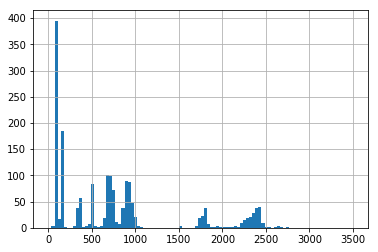

In [86]:
df_results[((df_results["size"]=="t3") & (df_results["metric"]=="Time") & (df_results["sampling"]=="distBased"))]["Performance"].hist(bins=100, range=(0,3500))

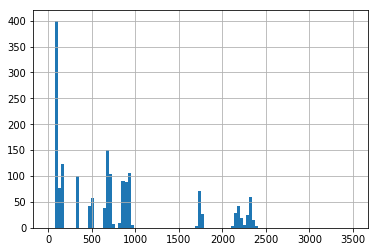

In [87]:
df_results[((df_results["size"]=="t3") & (df_results["metric"]=="Time") & (df_results["sampling"]=="divDistBased"))]["Performance"].hist(bins=100, range=(0,3500))

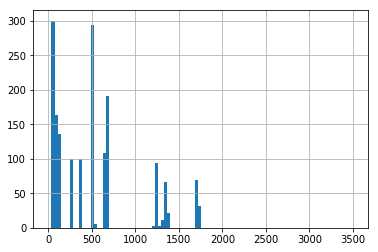

In [88]:
df_results[((df_results["size"]=="t3") & (df_results["metric"]=="Time") & (df_results["sampling"]=="henard"))]["Performance"].hist(bins=100, range=(0,3500))

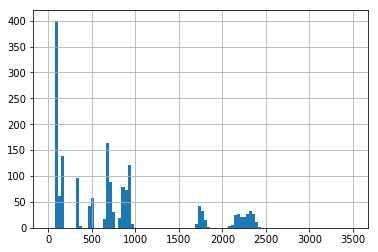

In [89]:
df_results[((df_results["size"]=="t3") & (df_results["metric"]=="Time") & (df_results["sampling"]=="random"))]["Performance"].hist(bins=100, range=(0,3500))

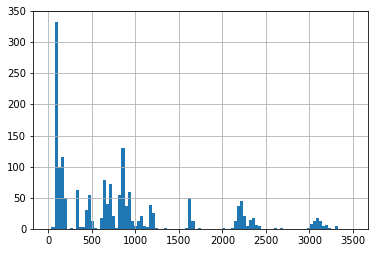

In [90]:
df_results[((df_results["size"]=="t3") & (df_results["metric"]=="Time") & (df_results["sampling"]=="solverBased"))]["Performance"].hist(bins=100, range=(0,3500))

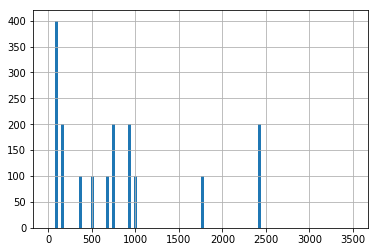

In [91]:
df_results[((df_results["size"]=="t3") & (df_results["metric"]=="Time") & (df_results["sampling"]=="twise"))]["Performance"].hist(bins=100, range=(0,3500))

In [99]:
results = []
#for r_dir in ["AllExperiments_Size", "AllExperiments_Time"]:
for r_dir in ["AllExperiments_Time"]:
    metric = r_dir.split("_")[1]
    list_video_dir = [i for i in os.listdir(r_dir) if i.startswith("x264")]
    for v_d in list_video_dir:
        video = v_d.split("_")[1]
        list_run_dir = [i for i in os.listdir(r_dir+"/"+v_d) if i.startswith("x264")]
        for r_d in list_run_dir:
            run = r_d.split("_")[2]
            list_csv = [i for i in os.listdir(r_dir+"/"+v_d+"/"+r_d) if i.endswith(".csv")]
            for csv in list_csv:
                _, sampling, size = csv.split(".")[0].split("_")
                df = pd.read_csv(r_dir+"/"+v_d+"/"+r_d+"/"+csv, sep=";")
                result = pd.DataFrame({"Performance":df["Performance"]})
                result["video"] = video
                result["run"] = run
                result["sampling"] = sampling
                result["size"] = size
                result["metric"] = metric
                results.append(result)

In [100]:
df_results_all = pd.concat(results)

In [101]:
df_results_all

,Performance,video,run,sampling,size,metric
0,5.010375,15,82,solverBased,t2,Time
1,6.281000,15,82,solverBased,t2,Time
2,5.153625,15,82,solverBased,t2,Time
3,5.465375,15,82,solverBased,t2,Time
4,6.276000,15,82,solverBased,t2,Time
...,...,...,...,...,...,...
207,2.686000,8,38,divDistBased,t3,Time
208,2.162455,8,38,divDistBased,t3,Time
209,3.590182,8,38,divDistBased,t3,Time
210,2.810091,8,38,divDistBased,t3,Time


solverBased


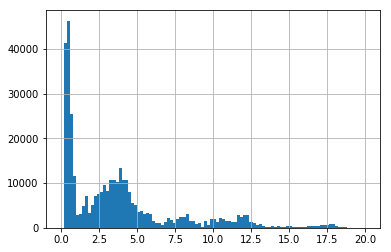

In [117]:
print("solverBased")
df_results_all[((df_results_all["size"]=="t3") & (df_results_all["metric"]=="Time") & (df_results_all["sampling"]=="solverBased"))]["Performance"].hist(bins=100, range=(0,20))

random


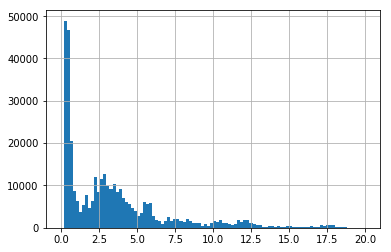

In [118]:
print("random")
df_results_all[((df_results_all["size"]=="t3") & (df_results_all["metric"]=="Time") & (df_results_all["sampling"]=="random"))]["Performance"].hist(bins=100, range=(0,20))

twise


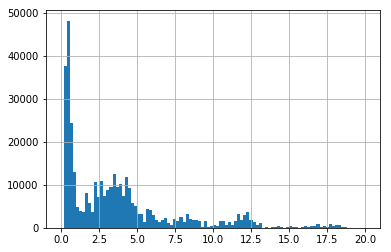

In [119]:
print("twise")
df_results_all[((df_results_all["size"]=="t3") & (df_results_all["metric"]=="Time") & (df_results_all["sampling"]=="twise"))]["Performance"].hist(bins=100, range=(0,20))

henard


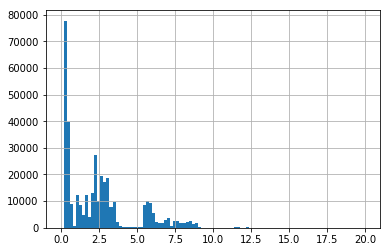

In [120]:
print("henard")
df_results_all[((df_results_all["size"]=="t3") & (df_results_all["metric"]=="Time") & (df_results_all["sampling"]=="henard"))]["Performance"].hist(bins=100, range=(0,20))

distBased


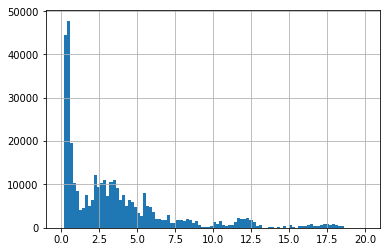

In [121]:
print("distBased")
df_results_all[((df_results_all["size"]=="t3") & (df_results_all["metric"]=="Time") & (df_results_all["sampling"]=="distBased"))]["Performance"].hist(bins=100, range=(0,20))

divDistBased


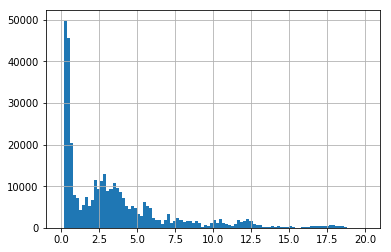

In [122]:
print("divDistBased")
df_results_all[((df_results_all["size"]=="t3") & (df_results_all["metric"]=="Time") & (df_results_all["sampling"]=="divDistBased"))]["Performance"].hist(bins=100, range=(0,20))